<a href="https://colab.research.google.com/github/AndriyBabiy/goit_deep-learning/blob/main/01_PyTorch_Fundamentals/01_PyTorch_Fundementals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 - Pytorch Basics

This project is focued on utilising neural networks in order to predict which factors impact the strength of concrete.

In [172]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings;
warnings.simplefilter('ignore')

## Import Libraries and Data

In [173]:
from google.colab import drive
drive.mount('/content/drive/')

path_to_file = '/content/drive/MyDrive/GoIT_Neoversity/deep_learning/'

df = pd.read_csv(path_to_file + 'ConcreteStrengthData.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [174]:
df.head()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


## Exploratory Data Analysis

In [175]:
df.describe()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Based on the outline provided by the describe method it is evident that there are no missing values as all of the rows have similar amounts of datapoints. However, one thing that is noticable is that there are outliers in some of the rows as the maximum of the row seems to be greater than 3SD's above the mean.

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            1030 non-null   float64
 1   BlastFurnaceSlag           1030 non-null   float64
 2   FlyAshComponent            1030 non-null   float64
 3   WaterComponent             1030 non-null   float64
 4   SuperplasticizerComponent  1030 non-null   float64
 5   CoarseAggregateComponent   1030 non-null   float64
 6   FineAggregateComponent     1030 non-null   float64
 7   AgeInDays                  1030 non-null   int64  
 8   Strength                   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


Based on the above information it is also evident that the data is mainly of the numerical type.

In [177]:
target = 'Strength'
features = [col for col in df.columns if col != target]

print(f'Number of features: {len(features)}')
print('Features:', features)

Number of features: 8
Features: ['CementComponent ', 'BlastFurnaceSlag', 'FlyAshComponent', 'WaterComponent', 'SuperplasticizerComponent', 'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays']


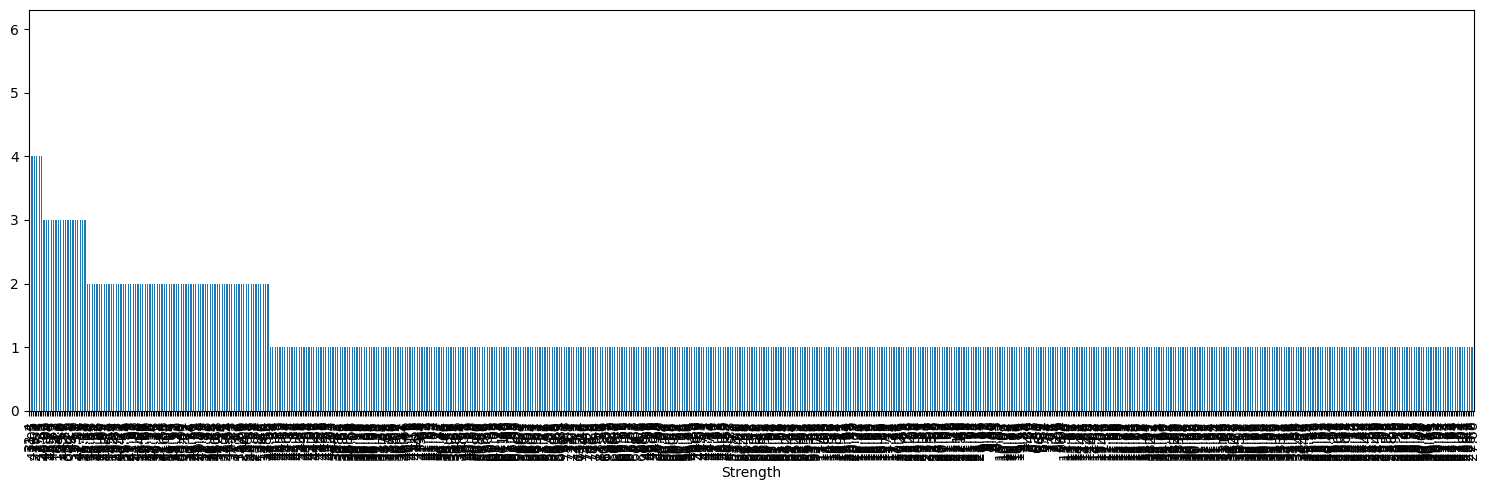

In [178]:
ax = df[target].sort_values().value_counts().plot(kind='bar', figsize=(15,5))

plt.tight_layout()
plt.show()

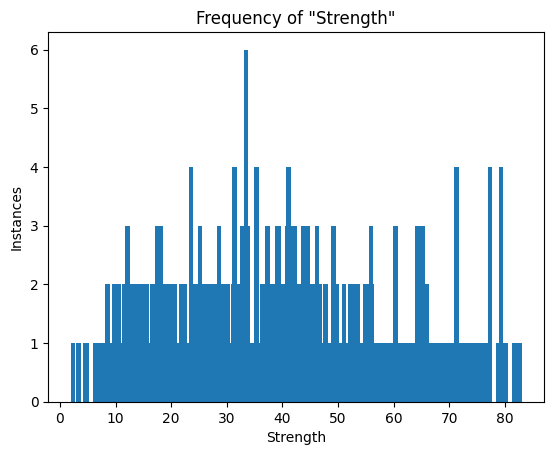

In [179]:
from collections import Counter

def target_dist(data_points):
  counter = Counter(data_points)

  sorted_data = sorted(counter.items())

  x_values, y_counts = zip(*sorted_data)

  plt.bar(x_values, y_counts)

  plt.xlabel(target)
  plt.ylabel('Instances')
  plt.title(f'Frequency of "Strength"')

  plt.show()

target_dist(df[target])

Based on the distribution of the target values it seems that there is a pattern of the strength distribution and that almost every value is unique, however there are some values that are seen more than once.

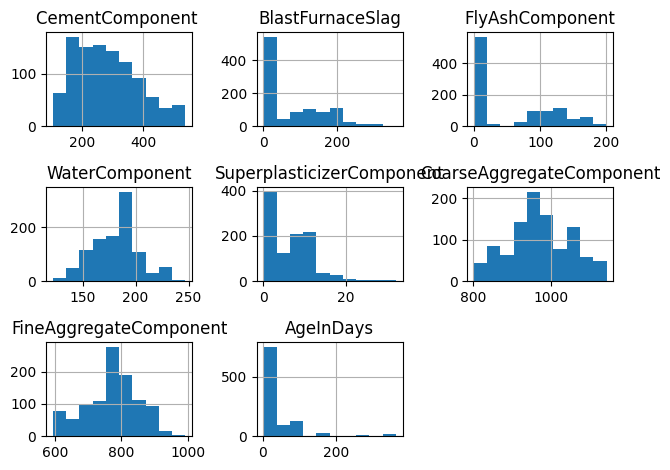

In [180]:
ax = df.loc[:, features].hist()

plt.tight_layout()
plt.show()

## Preparing the data for training

### Removing the outliers that have a z-score of over 3

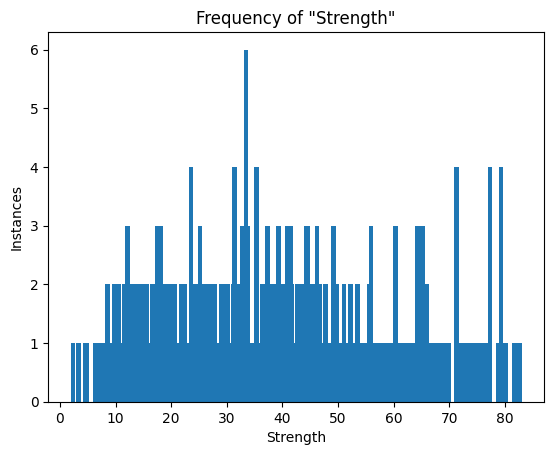

In [181]:
from scipy.stats import zscore
import numpy as np

df_z_score= zscore(df, nan_policy='omit')
df_out = np.abs(df_z_score).ge(3).astype(int).mean(1)

out_indexes = df_out[df_out > 0].index

df_clean = df.drop(index=out_indexes)

target_dist(df_clean[target])

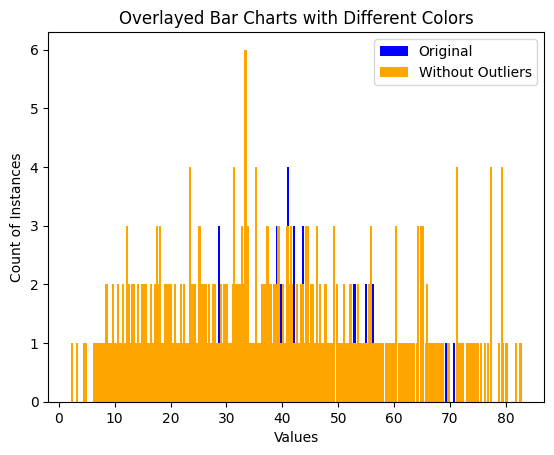

In [182]:
# Count the frequency of each value for both datasets
counter_1 = Counter(df[target])
counter_2 = Counter(df_clean[target])

# Sort the data based on the x-axis (values)
sorted_data_1 = sorted(counter_1.items())  # List of tuples (value, count)
sorted_data_2 = sorted(counter_2.items())  # List of tuples (value, count)

# Unpack the sorted values and counts
x_values_1, y_counts_1 = zip(*sorted_data_1)
x_values_2, y_counts_2 = zip(*sorted_data_2)

# Plotting the first dataset
plt.bar(x_values_1, y_counts_1, width=0.4, color='blue', align='center', label='Original')

# Plotting the second dataset with a slight shift on the x-axis for better visibility
plt.bar([x for x in x_values_2], y_counts_2, width=0.4, color='orange', align='center', label='Without Outliers')

# Adding labels, legend, and title
plt.xlabel('Values')
plt.ylabel('Count of Instances')
plt.title('Overlayed Bar Charts with Different Colors')
plt.legend()

# Display the plot
plt.show()

### Checking for covariance between the features

<Axes: >

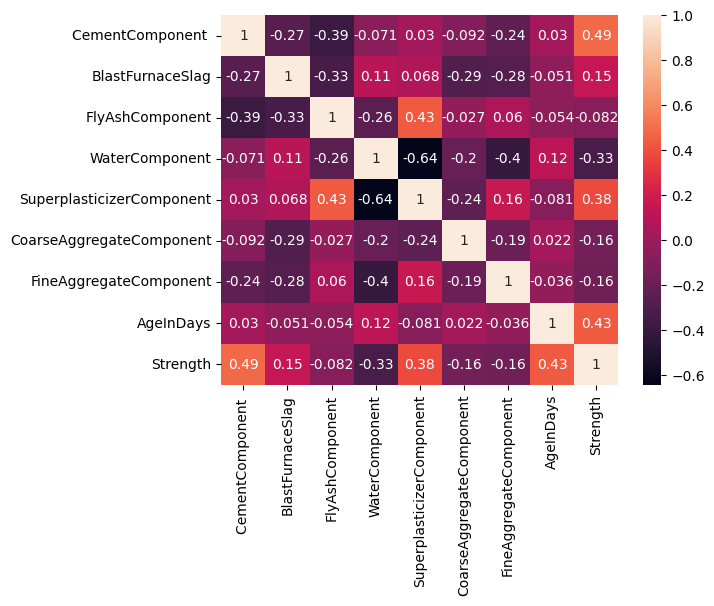

In [183]:
# =============================================================================
# Setting the df value
# =============================================================================
df = df_clean
# df = df

import seaborn as sns

corr_matrix = df.corr()

sns.heatmap(corr_matrix,
            annot=True)

<Figure size 400x400 with 0 Axes>

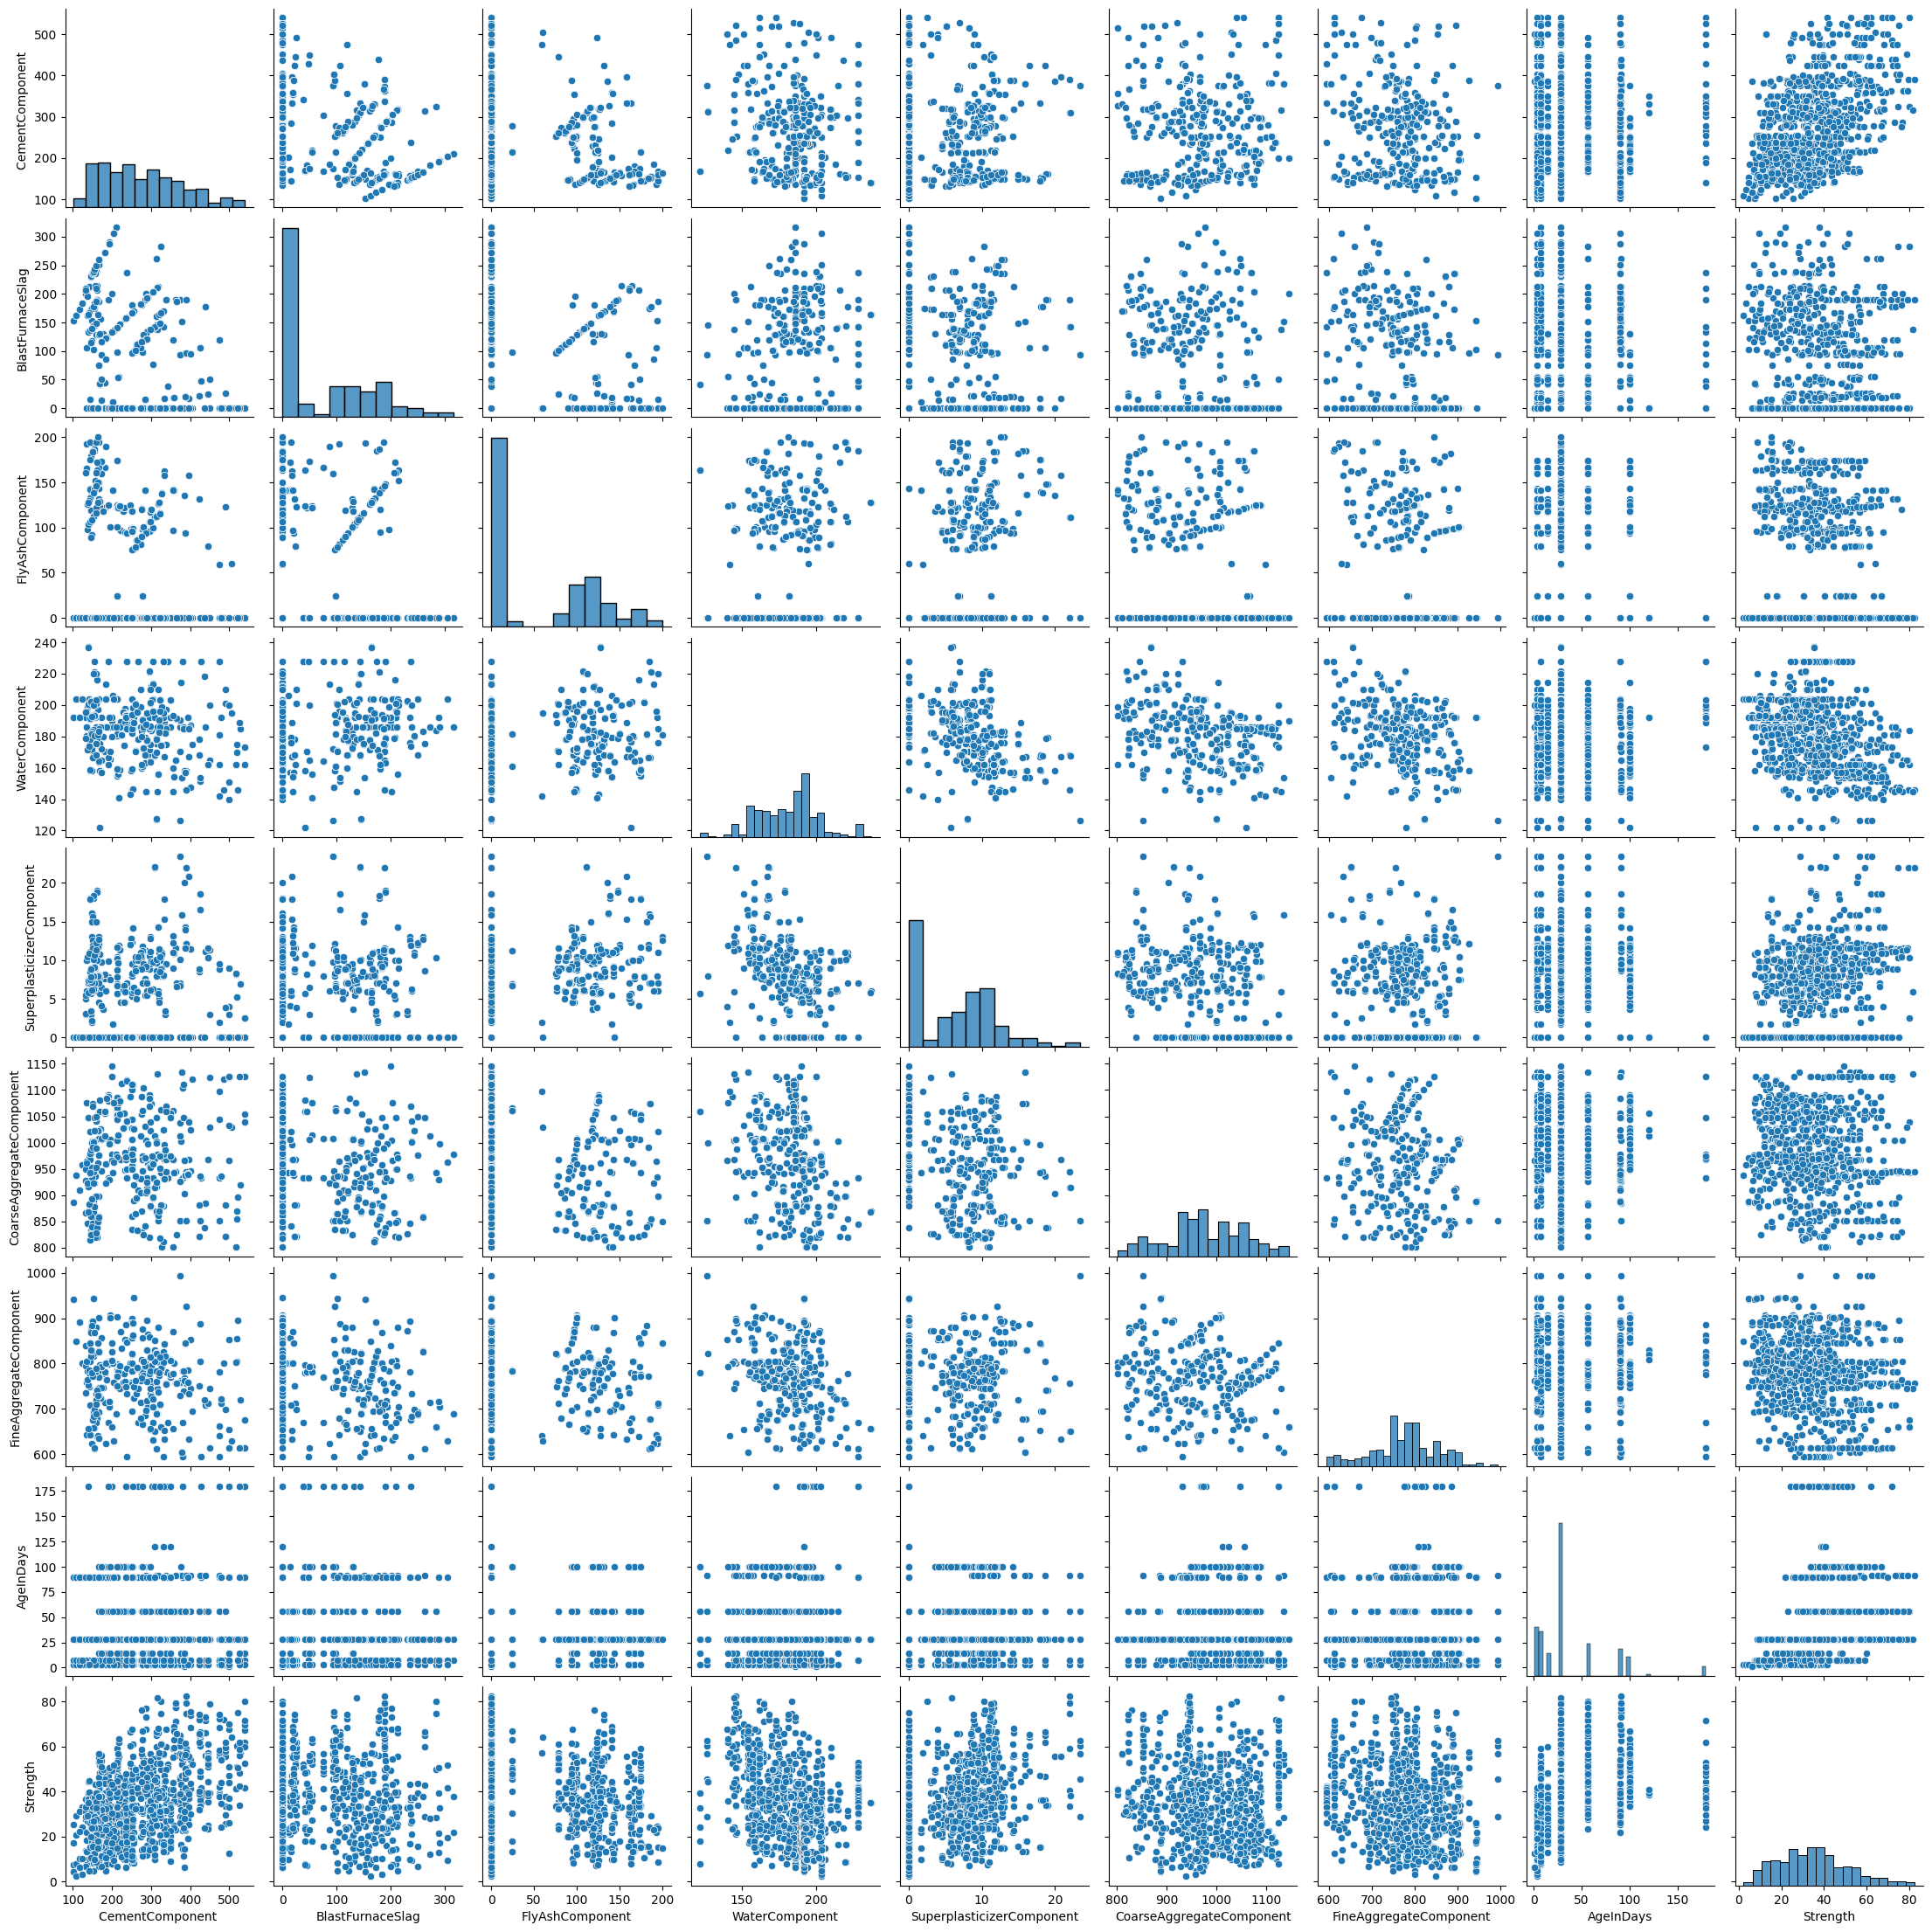

In [184]:
plt.figure(figsize=(4,4))
sns.pairplot(data=df)
plt.show()

From the correllation analysis it seems that there are no no features that correlate with others or features that correlate highly with the target. This allows us to proceed with the current data.

### Splitting the Data into training and testing

In [185]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Strength', axis=1),
                                                    df['Strength'],
                                                    test_size=0.2,
                                                    random_state=42)

## Creating and Training the neural network to predict concrete strength

### Creating a class ConcreteDataset

In [186]:
from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset, DataLoader
import torch

class ConcreteDataset ( Dataset ):
  def __init__ (self, X, y, scale=True):
    self.X = X.values
    self.y=y.to_numpy()

    if scale:
      sc = StandardScaler()
      self.X = sc.fit_transform(self.X)

  def __len__(self):
    return len(self.y)

  def __getitem__(self,idx):
    X = torch.tensor(self.X[idx], dtype=torch.float64)
    y = torch.tensor(self.y[idx], dtype=torch.float64)

    return X, y


train_dataset = ConcreteDataset(X_train, y_train)
test_dataset = ConcreteDataset(X_test, y_test)

### Create the DataLoaders

In [187]:
train_dataloader = DataLoader(train_dataset,
                              batch_size= 200,
                              num_workers=4)

test_dataloader = DataLoader(test_dataset,
                             batch_size = 200,
                             num_workers=4)

In [188]:
next(iter(train_dataloader))

[tensor([[-1.0712,  2.1739, -0.8899,  ..., -1.4909,  0.6745, -0.2292],
         [-0.8185,  2.5042, -0.8899,  ..., -0.5820, -0.7427, -0.8986],
         [-1.2481,  1.1867, -0.8899,  ...,  0.3166,  0.6963, -0.2292],
         ...,
         [ 1.0329, -0.8566, -0.8899,  ...,  0.9285, -0.4457, -0.7915],
         [ 0.2826,  1.5181, -0.8899,  ..., -0.1263, -1.8322,  1.4307],
         [-1.1587,  1.8974, -0.8899,  ..., -0.5103,  0.0907, -0.2292]],
        dtype=torch.float64),
 tensor([37.9200, 12.7900, 26.9200, 32.8200, 40.7600, 33.4000,  7.7500, 12.4600,
         25.1200, 15.4400, 58.6100, 44.8700, 42.0300, 71.3000, 24.3400, 49.2000,
         34.5700, 21.9100, 47.1000, 26.7400, 35.9600, 17.2000, 72.1000, 17.9600,
         47.2200, 47.0300, 71.3000, 53.6600,  7.6800, 43.5000, 22.3200, 21.0700,
         39.2900, 33.4000, 24.4400, 56.6100, 12.5500, 21.9700, 50.7000, 26.8500,
         40.2300, 27.7700, 39.3200, 36.3500, 19.7700, 31.9700, 13.2000, 36.2500,
         38.0000, 52.9100, 24.2800, 44.3300

### Building the Linear Model

In [189]:
import torch.nn as nn

class LinearModel(torch.nn.Module):
  def __init__(self, in_dim, out_dim = 1):
    super().__init__()

    self.features = torch.nn.Sequential(
        nn.Linear(in_dim, 256),
        torch.nn.ReLU(),

        nn.Linear(256, 128),
        torch.nn.ReLU(),

        nn.Linear(128, 64),
        torch.nn.ReLU(),

        nn.Linear(64, out_dim),
    )

  def forward(self, x):
    output = self.features(x)
    return output

Initializing the model

In [190]:
model = LinearModel(in_dim=X_train.shape[1], out_dim=1)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

train_losses = []
train_rmses = []
test_losses = []
test_rmses = []

In [191]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

num_epochs = 200

def RMSE(train, pred):
  return np.sqrt(mean_squared_error(train, pred))


for epoch in range(num_epochs):
  model.train()
  y_pred_train = []

  for data in train_dataloader:
    inputs, targets = data
    inputs, targets = inputs.float(), targets.float()
    targets = targets.reshape((targets.shape[0], 1))

    outputs = model(inputs)
    loss = criterion(outputs, targets)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    y_pred_train.extend(outputs.cpu().detach().numpy())

  if (epoch+1) % 10 == 0:
    print(f'Epoch [ {epoch+1} / {num_epochs}], Loss: {loss.item(): .4f}, RMSE: {RMSE(y_train, y_pred_train): .4f}')
  train_rmses.append(RMSE(y_train, y_pred_train))
  train_losses.append(loss.cpu().detach().numpy())


  model.eval()
  y_pred_test = []

  with torch.no_grad():
    for data in test_dataloader:
      inputs, targets = data
      inputs, targets = inputs.float(), targets.float()
      targets = targets.reshape((targets.shape[0], 1))

      outputs = model(inputs)
      loss = criterion(outputs, targets)

      y_pred_test.extend(outputs.cpu().detach().numpy())

    test_rmses.append(RMSE(y_test, y_pred_test))
    test_losses.append(loss.cpu().detach().numpy())

Epoch [ 10 / 200], Loss:  127.9842, RMSE:  10.9960
Epoch [ 20 / 200], Loss:  48.7203, RMSE:  7.2887
Epoch [ 30 / 200], Loss:  23.8349, RMSE:  5.0380
Epoch [ 40 / 200], Loss:  18.6092, RMSE:  4.3544
Epoch [ 50 / 200], Loss:  15.1859, RMSE:  3.9146
Epoch [ 60 / 200], Loss:  13.0293, RMSE:  3.5923
Epoch [ 70 / 200], Loss:  11.8847, RMSE:  3.3636
Epoch [ 80 / 200], Loss:  11.6057, RMSE:  3.2380
Epoch [ 90 / 200], Loss:  12.5303, RMSE:  3.5303
Epoch [ 100 / 200], Loss:  23.9358, RMSE:  4.4602
Epoch [ 110 / 200], Loss:  10.7731, RMSE:  3.4766
Epoch [ 120 / 200], Loss:  7.9435, RMSE:  2.9317
Epoch [ 130 / 200], Loss:  7.9475, RMSE:  2.8358
Epoch [ 140 / 200], Loss:  6.7861, RMSE:  2.9351
Epoch [ 150 / 200], Loss:  22.1124, RMSE:  3.8562
Epoch [ 160 / 200], Loss:  13.6481, RMSE:  3.6068
Epoch [ 170 / 200], Loss:  11.3546, RMSE:  3.1169
Epoch [ 180 / 200], Loss:  6.4096, RMSE:  2.7218
Epoch [ 190 / 200], Loss:  7.0666, RMSE:  2.7516
Epoch [ 200 / 200], Loss:  7.2338, RMSE:  3.0241


## Analyse the model performance

In [192]:
model.eval()
predictions = []
actuals = []

with torch.no_grad():
    for inputs, targets in test_dataloader:
        inputs, targets = data
        inputs, targets = inputs.float(), targets.float()

        outputs = model(inputs)
        predictions.extend(outputs.tolist())
        actuals.extend(targets.tolist())

# Обчислення метрик
mse = mean_squared_error(actuals, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actuals, predictions)
r2 = r2_score(actuals, predictions)


print(f'MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}')

# 1. Середньоквадратична похибка (MSE):
# непогані результати: 75-55;
# хороші результати: 55-35;
# відмінні результати: < 35.


# 2. Середня абсолютна похибка (MAE):
# непогані результати: 10-8;
# хороші результати: 8-5;
# відмінні результати: < 5.


# 3. Коефіцієнт детермінації (R²):
# непогані результати: 0.6-0.7;
# хороші результати: 0.7-0.8;
# відмінні результати: > 0.8.

MSE: 32.4607, RMSE: 5.6974, MAE: 3.9170, R²: 0.8769


On the first run of the model the results were as follows:
- MSE: 193.8193, RMSE: 13.9219, MAE: 11.5310, R²: 0.2652

These results were based on simply using the data to train the model (no additional feature engineering), the model ran for 100 epochs, with the MSELoss criterion and Adam optimiser at a learning rate of 1e-4.

Following this I increased the number of epochs and this resulted in an improvement in all of the scores bar the RMSE which became worse. Afer noticing this I devided to remove the filtering out of the outliers and this had a positive impact on the results relative to the original readings.
- MSE: 134.4495, RMSE: 11.5952, MAE: 10.2394, R²: 0.5587

Following this I decided to adjust the learning rate to 0.01. This is far greater than the original 1e-4. This had a tremendous impact on the resuls.
- MSE: 23.8327, RMSE: 4.8819, MAE: 4.4283, R²: 0.9218

This shows that in the original runs of the model the learning rate was far too small and was not coming near the minimum, whereas in the greater level of the learning rate there was a quicker movement towards the minimum. I also attempted to reintroduce the removal of the outliers, however this had an adverse affect on most of the metrics bar the MAE which improved and dropped to 3.91. The disimprovement in the other metrics showed that there was no need to remove the outliers and instead that they assisted in avoiding overtraining.

## Conclusion and analysis of the results